In [ ]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.9/359.9 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━

In [ ]:
import qiskit
import numpy as np
qiskit.version.get_version_info()


'2.0.0'

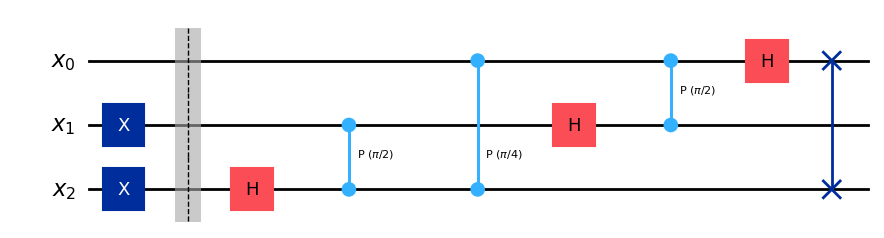

In [ ]:

import numpy as np
from qiskit import QuantumCircuit,QuantumRegister

# 3 qubit 양자 회로를 초기화한다.
qr = QuantumRegister(3,'x')
qc = QuantumCircuit(qr)

# 입력상태를 0b110 로 초기화한다.
qc.x(qr[1:3])
qc.barrier()

# 3 qubit QFT circuit
qc.h(2)
qc.cp(np.pi/2, 1, 2) # cR2
qc.cp(np.pi/4, 0, 2) # cR3
qc.h(1)
qc.cp(np.pi/2, 0, 1) # cR2
qc.h(0)
qc.swap(0,2) # reverse qubit order
qc.draw(output='mpl')

In [ ]:
# 2. Add the classical output in the form of measurement of all qubits
qc_measured = qc.measure_all(inplace=False)

# 3. Execute using a simulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc_measured)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10000)
result = job.result()
count = result[0].data.meas.get_counts()
print(count)

{'011': 1254, '110': 1303, '111': 1197, '000': 1231, '010': 1297, '100': 1242, '001': 1223, '101': 1253}


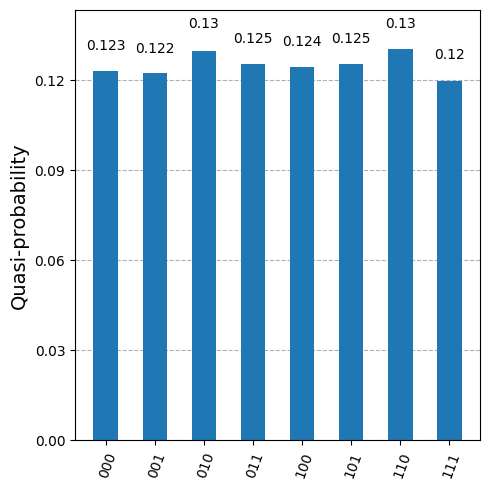

In [ ]:
from qiskit.visualization import plot_distribution
plot_distribution(count, figsize=(5, 5))


In [ ]:
# 회로의 양자 상태를 상태 벡터로 출력
from qiskit.quantum_info import Statevector
sv = Statevector(qc)
sv.draw(output = 'latex')

<IPython.core.display.Latex object>

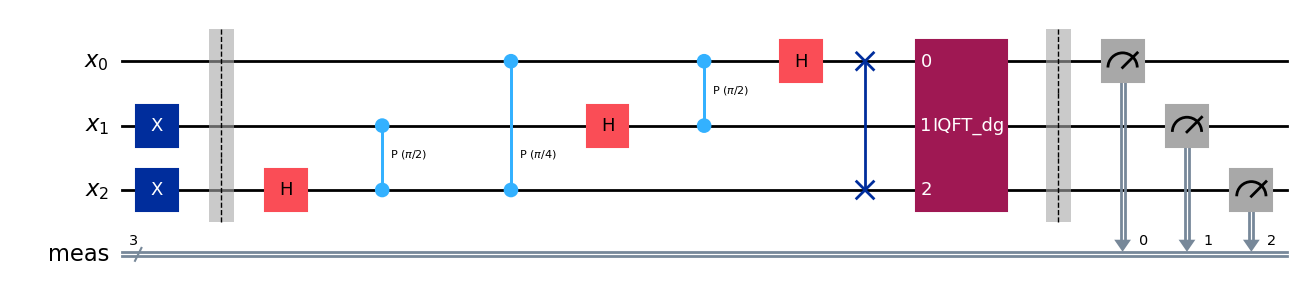

In [ ]:
from qiskit.circuit.library import QFT
qc.compose(QFT(3, inverse=True), range(3), inplace=True)
qc.measure_all()
qc.draw(output='mpl',fold=-1)

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1000)
result = job.result()
count = result[0].data.meas.get_counts()
print(count)

{'110': 1000}


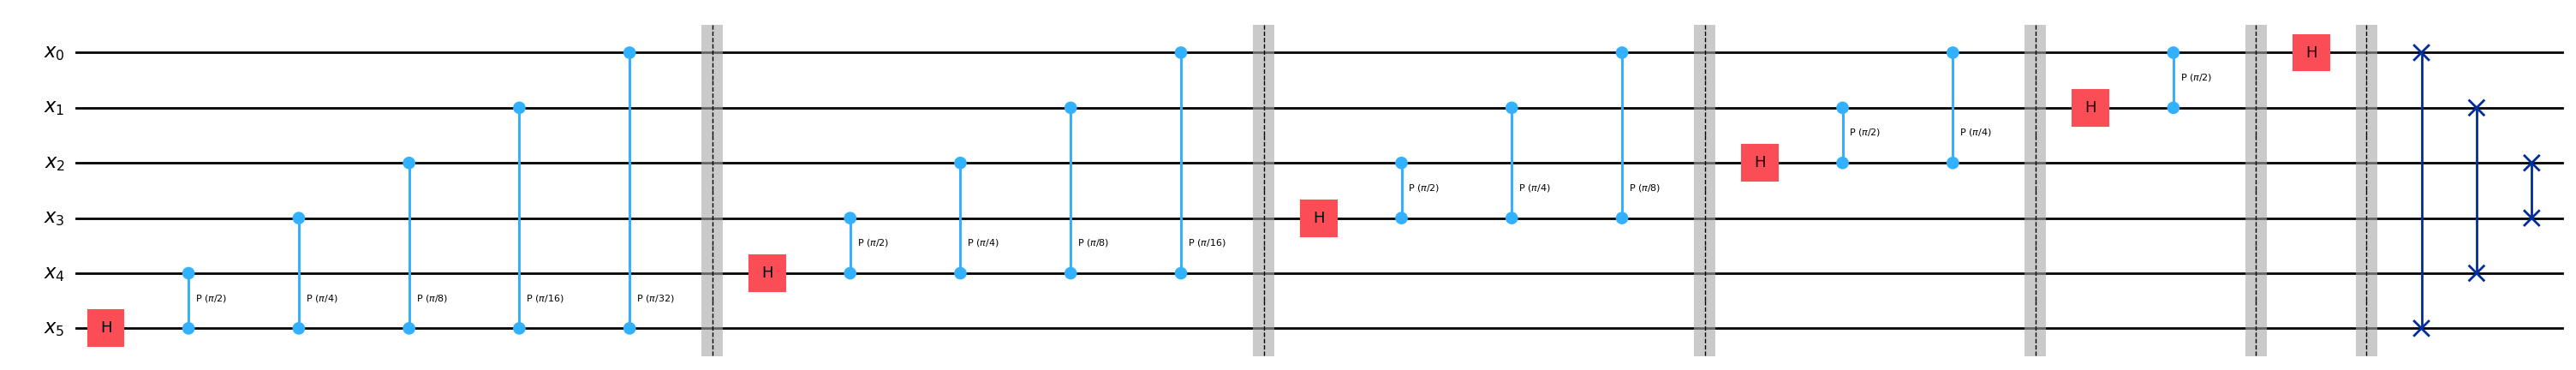

In [ ]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister

def myQFT(n) :
    qr = QuantumRegister(n,'x')
    qc = QuantumCircuit(qr)

    for i in range(n-1, -1, -1):
      qc.h(qr[i])
      for j in range(i-1, -1, -1):
        qc.cp(np.pi / (2 ** (i - j)), qr[j], qr[i])
      qc.barrier()

    for i in range(n//2):
      qc.swap(i, n-i-1)

    qc.name = 'QFT'
    return qc

n=6
qr = QuantumRegister(n,'x')
qc = QuantumCircuit(qr)
qc.compose(myQFT(n),inplace=True)
qc.draw(output='mpl',fold=-1)

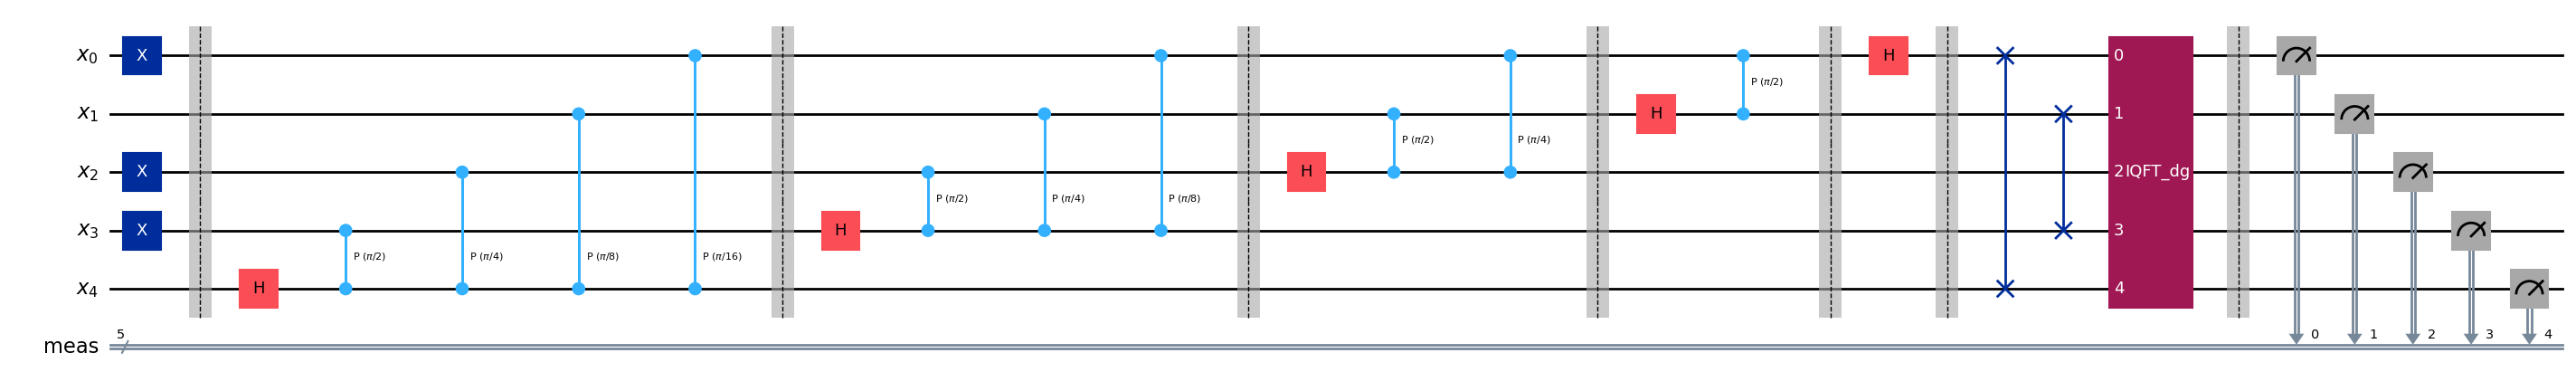

In [ ]:
# 양자 회로를 초기화한다.
n=5
qr = QuantumRegister(n,'x')
qc = QuantumCircuit(qr)

# 입력상태를 0b1101 로 초기화한다.
qc.x([0,2,3])
qc.barrier()
qc.compose(myQFT(n), qr[:], inplace=True)
from qiskit.circuit.library import QFT
qc.compose(QFT(n, inverse=True), range(n), inplace=True)
qc.measure_all()
qc.draw(output='mpl',fold=-1)

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=100)
result = job.result()
count = result[0].data.meas.get_counts()
print(count)

{'01101': 100}
